In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [12]:
df = pd.read_csv('merged_df.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26881 entries, 0 to 26880
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company                26881 non-null  int64  
 1   Model                  26881 non-null  object 
 2   Engine_Displacement_L  26881 non-null  float64
 3   Engine_Cylinders       26881 non-null  int64  
 4   Transmission_Type      26881 non-null  int64  
 5   Drive                  26881 non-null  int64  
 6   Fuel                   26881 non-null  int64  
 7   Cert_Region            26881 non-null  object 
 8   Underhood_Id           26881 non-null  object 
 9   Veh_Class              26881 non-null  int64  
 10  Air_Pollution_Score    26881 non-null  float64
 11  City_Mpg               26881 non-null  int64  
 12  Hwy_Mpg                26881 non-null  float64
 13  Combined_Mpg           26881 non-null  int64  
 14  Greenhouse_Gas_Score   26881 non-null  int64  
 15  Sm

In [14]:
num_features = [
    "Engine_Displacement_L", "Engine_Cylinders", "Air_Pollution_Score",
    "City_Mpg", "Hwy_Mpg", "Combined_Mpg", "Greenhouse_Gas_Score",
    'Company', 'Transmission_Type', 'Drive', 'Fuel', 'Smartway' 
]

In [15]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_features])


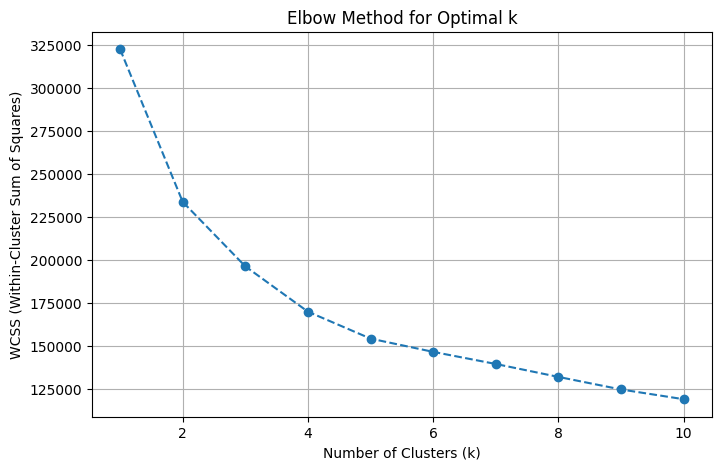

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Trying different k values for K-Means (from 1 to 10)
wcss = []  # Store Within-Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


In [17]:
wcss

[322571.9999999997,
 233833.19486652868,
 196355.36871423642,
 170002.10562137427,
 154342.98764598818,
 146645.57131484261,
 139599.2774421162,
 132084.56363863975,
 124785.25466215698,
 119121.76771416992]

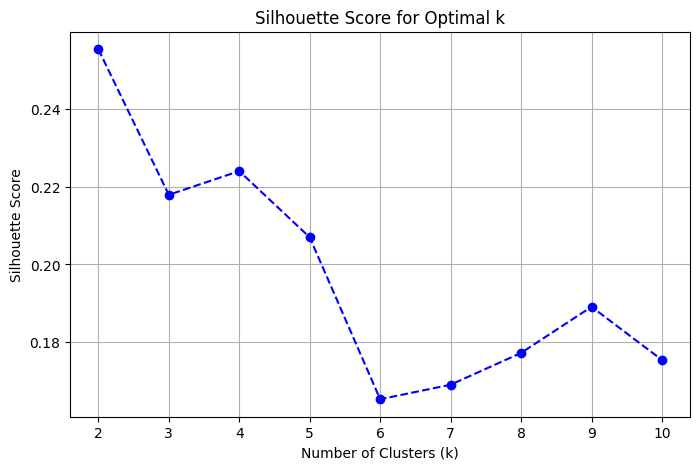

In [18]:
from sklearn.metrics import silhouette_score

# Trying k values from 2 to 10 (we avoid k=1 as Silhouette Score is not defined for k=1)
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.grid(True)
plt.show()


In [19]:
# Import K-Means
from sklearn.cluster import KMeans

# Apply K-Means with k=3
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Check cluster distribution
df["Cluster"].value_counts()


Cluster
3    6451
2    5579
5    5555
0    5042
1    4104
4     150
Name: count, dtype: int64

In [20]:
cluster_summary = df.groupby("Cluster")[num_features].mean()
print(cluster_summary)


         Engine_Displacement_L  Engine_Cylinders  Air_Pollution_Score  \
Cluster                                                                 
0                     3.615609          6.202301             5.759123   
1                     2.331335          4.401072             5.494883   
2                     2.053379          4.166517             6.624126   
3                     3.014990          5.399318             5.597039   
4                     1.774667          3.933333             6.920000   
5                     5.408281          8.533933             5.221962   

          City_Mpg    Hwy_Mpg  Combined_Mpg  Greenhouse_Gas_Score    Company  \
Cluster                                                                        
0        17.139230  24.660254     19.844506              4.502777  23.760809   
1        21.829678  30.015838     24.846491              5.710770  31.075292   
2        26.667862  34.178527     29.465137              7.371393  32.153074   
3        18.462

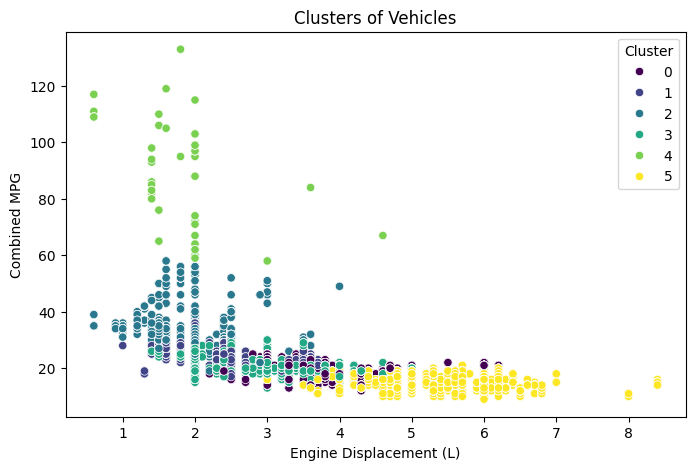

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Engine_Displacement_L"], y=df["Combined_Mpg"], hue=df["Cluster"], palette="viridis")
plt.xlabel("Engine Displacement (L)")
plt.ylabel("Combined MPG")
plt.title("Clusters of Vehicles")
plt.show()


In [22]:
cluster_summary = df.groupby("Cluster")[["Engine_Displacement_L", "Combined_Mpg"]].mean()
print(cluster_summary)


         Engine_Displacement_L  Combined_Mpg
Cluster                                     
0                     3.615609     19.844506
1                     2.331335     24.846491
2                     2.053379     29.465137
3                     3.014990     20.987599
4                     1.774667     89.233333
5                     5.408281     15.053645


In [23]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert PCA results into a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']


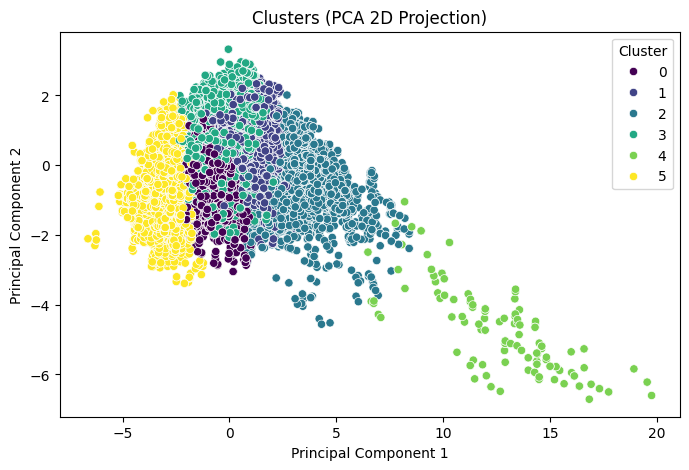

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster"], palette="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters (PCA 2D Projection)")
plt.show()


Answer = 6